# Causal Data Science Week 1 Tutorial

This is the first tutorial for the Causal Data Science course. In it, we will give an overview of the python libaries that are used in the course: numpy, pandas, and more. Familiarity with these libraries is necessary to apply the 'DoWhy' package - a library used in implementing causal analysis.

## numpy

numpy is a library used for storing data and performing numerical operations on it. The documentation is available at: https://numpy.org/doc/stable/index.html, which is where these examples are drawn from (here we show just some exampes of what we can do with numpy).

In [1]:
# we first import numpy under the name 'np'
import numpy as np

# we convert the python list [6, 7, 8] into a numpy array name 'a'
a = np.array([6, 7, 8])

# we can view 'a' by calling it
a

array([6, 7, 8])

numpy arrays can be multidimensional. Here, we used arange(15) to make the list [0, 1, 2, 3, 4, ..., 14], and turn it into a 3 x 5 matrix, and name it 'b'

In [3]:
b = np.arange(15).reshape(3, 5)

# we can again view 'b'
b

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

We can perform operations on numpy arrays. Some of the key functions include things like addition, subtraction, exponentiation

In [4]:
# we create two numpy arrays, 'a' and 'b', and add them together
a = np.array([20, 30, 40, 50])
b = np.arange(4) # this is the array [0, 1, 2, 3]
a + b

array([20, 31, 42, 53])

Arrays can be indexed and sliced the same way as lists in python

In [5]:
# we view the array 'a' from the first element (labelled 0) to the 2nd element
a[0:2]

array([20, 30])

With numpy and the other libraries we are using, you can usually find answers to any questions you have quite easily by googling/StackOverflow e.g. 'how to do integration numpy'

## pandas

pandas are used to store and manipulate dataframes, with multiple columns measuring different attributes. They are used as inputs for many machine learning libraries, including the library used in this course: DoWhy. Information and examples are available at https://pandas.pydata.org/pandas-docs/stable/index.html 

In [6]:
# we first import pandas under the name 'pd'
import pandas as pd

# we create a dataframe name 'df'. The letters 'A', 'B', 'C', etc. represent the columns and the rest the values for that column
df = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)

# we can view our dataframe by calling it
df

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [7]:
# we can view the first n rows of a dataframe using 'dataframe_name'.head(n)
df.head(3) # first three rows

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo


In [8]:
# we can view column(s) from the dataframe by calling the desired column(s)
df['E'] # column E

0     test
1    train
2     test
3    train
Name: E, dtype: category
Categories (2, object): ['test', 'train']

In [9]:
# we can view specific rows using indices
df[0:2] # rows 0 to 1

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo


Data in a pandas dataframe can be plotted easily using matplotlib

<AxesSubplot:>

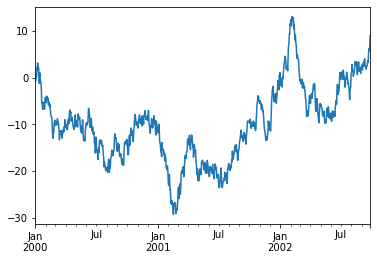

In [10]:
# we import pyplot with the name 'plt'
import matplotlib.pyplot as plt

# we create a random pandas series and apply the cumsum function
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))

ts = ts.cumsum()

ts.plot() # this is the command that plots the data

In [11]:
ts # this is the data plotted above

2000-01-01   -0.296748
2000-01-02   -0.652370
2000-01-03    0.645484
2000-01-04   -0.004092
2000-01-05    0.406267
                ...   
2002-09-22    6.246484
2002-09-23    5.929013
2002-09-24    5.752102
2002-09-25    7.093787
2002-09-26    9.008724
Freq: D, Length: 1000, dtype: float64

In [12]:
# here we've created a pandas dataframe again using random data, now with fours different columns 'A', 'B', 'C', and 'D'
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)

# again we apply the cumsum function
df = df.cumsum()

df

,A,B,C,D
2000-01-01,0.437116,-1.139073,-0.059818,-1.245539
2000-01-02,0.860794,-0.167006,0.507273,-1.729218
2000-01-03,0.396377,0.264662,1.286388,-2.822474
2000-01-04,1.043579,-0.992670,0.310455,-2.720568
2000-01-05,1.649378,2.065611,1.009002,-2.465176
...,...,...,...,...
2002-09-22,-26.839579,-0.258749,14.349762,-70.602810
2002-09-23,-27.281221,0.189032,15.229681,-68.912456
2002-09-24,-26.547251,0.096938,17.058188,-68.359866
2002-09-25,-26.704838,-0.451648,17.094288,-69.665902


<Figure size 432x288 with 0 Axes>

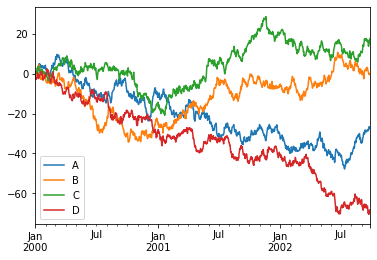

In [13]:
plt.figure()

# we can again plot the data, only now different columns are plotted separately
df.plot()

plt.legend(loc='best') # each column is plotted as a separate line in the plot

Data can be read into and written from pandas dataframes using formats like csv and excel files  

In [14]:
df.to_csv("foo.csv") # writing to a file called 'foo' with type csv

In [15]:
df2 = pd.read_csv("foo.csv") # reading from a csv file called 'foo'

# we can view the imported dataframe
df2

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.437116,-1.139073,-0.059818,-1.245539
1,2000-01-02,0.860794,-0.167006,0.507273,-1.729218
2,2000-01-03,0.396377,0.264662,1.286388,-2.822474
3,2000-01-04,1.043579,-0.992670,0.310455,-2.720568
4,2000-01-05,1.649378,2.065611,1.009002,-2.465176
...,...,...,...,...,...
995,2002-09-22,-26.839579,-0.258749,14.349762,-70.602810
996,2002-09-23,-27.281221,0.189032,15.229681,-68.912456
997,2002-09-24,-26.547251,0.096938,17.058188,-68.359866
998,2002-09-25,-26.704838,-0.451648,17.094288,-69.665902


As with numpy, most of your questions about pandas can be answered with some good googling!

## scikit-learn

scikit-learn is a library used for tackling machine learning problems. It implements a number of supervised and unsupervised learning algorithms. The documentation is available at https://scikit-learn.org/stable/, and these examples are taken from https://scikit-learn.org/stable/tutorial/basic/tutorial.html.

Here, we import some example data from the library and fit a support vector machine (SVM) to classify what digits certain images show.

In [16]:
# we import 'datasets' from sklearn and load the 'digits' data
from sklearn import datasets
digits = datasets.load_digits()

We have a features data set (digits.data) and a targets data set (digits.target).

In [17]:
print(digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [18]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

We can learn a model using 'fit', and then estimate targets based on unseen features using 'predict'. In this case, we use all data except the last sample to build the model, and then predict on the last. The model predicts that this last digit is '8'.

In [19]:
from sklearn import svm
# we create a svm.SVC object called 'clf'
clf = svm.SVC(gamma=0.001, C=100.)

# we fit the model using the 'digits' data, leaving out the last data point
clf.fit(digits.data[:-1], digits.target[:-1])

SVC(C=100.0, gamma=0.001)

In [20]:
# we can now use our fitted model to predict the last data point
clf.predict(digits.data[-1:])

array([8])

## DoWhy

DoWhy (https://microsoft.github.io/dowhy/) is a Python library designed for performing causal inference. This is one of the main libraries we will be using in this course. It allows one quickly to identify and test causal relationships based on data and a causal graph.

You will first need to install the library using:
pip install dowhy

We will go through the example at https://microsoft.github.io/dowhy/dowhy_simple_example.html to get a basic overview of the library. It is not expected that you understand all steps of this process now, as this is what you will be learning through the course.

In [21]:
# we import the 'dowhy' library, the 'CausalModel' class, and 'dowhy.datasets' (this last for generated simulated data to test)
import dowhy
from dowhy import CausalModel
import dowhy.datasets

# the code below simple hides some warnings we don't want to see
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action='ignore', category=FutureWarning)

We use a data generator from DoWhy to create a simulated data set where 'beta' is the true causal effect. This data also has a causal graph associated with it.

In [22]:
data = dowhy.datasets.linear_dataset(beta=10,
        num_common_causes=5,
        num_instruments = 2,
        num_samples=10000,
        treatment_is_binary=True)

# we extract the generated dataframe, and name it 'df'
df = data["df"]

# we can view the first few entries in the dataframe
print(df.head())

    Z0        Z1        W0        W1        W2        W3        W4     v0  \
0  0.0  0.509658 -0.462934  1.223419  0.285321 -1.067197 -0.403500   True   
1  1.0  0.286485 -0.470259  0.207869  0.523244 -0.661069 -0.269766   True   
2  0.0  0.768749  0.667509  2.232762  1.160855  1.334139 -0.124871   True   
3  0.0  0.173431 -0.037061  0.698313  0.583871  0.653456 -0.847430   True   
4  0.0  0.109934 -2.029897  1.239086  0.060295 -0.268528 -0.583167  False   

           y  
0  11.251031  
1   9.384704  
2  22.713527  
3  13.065827  
4  -0.340746  


There is also a causal graph for this data, and we can view it in two different formats: 'dot graph' and 'gml graph'

In [23]:
print(data["dot_graph"])

digraph {v0->y;W0-> v0; W1-> v0; W2-> v0; W3-> v0; W4-> v0;Z0-> v0; Z1-> v0;W0-> y; W1-> y; W2-> y; W3-> y; W4-> y;}


In [24]:
print(data["gml_graph"])

graph[directed 1node[ id "y" label "y"]node[ id "W0" label "W0"] node[ id "W1" label "W1"] node[ id "W2" label "W2"] node[ id "W3" label "W3"] node[ id "W4" label "W4"]node[ id "Z0" label "Z0"] node[ id "Z1" label "Z1"]node[ id "v0" label "v0"]edge[source "v0" target "y"]edge[ source "W0" target "v0"] edge[ source "W1" target "v0"] edge[ source "W2" target "v0"] edge[ source "W3" target "v0"] edge[ source "W4" target "v0"]edge[ source "Z0" target "v0"] edge[ source "Z1" target "v0"]edge[ source "W0" target "y"] edge[ source "W1" target "y"] edge[ source "W2" target "y"] edge[ source "W3" target "y"] edge[ source "W4" target "y"]]


We create a causal model with the data, the treatment variable, the outcome variable, and the causal graph.

In [25]:
# With graph
model=CausalModel(
        data = df,
        treatment=data["treatment_name"],
        outcome=data["outcome_name"],
        graph=data["gml_graph"]
        )

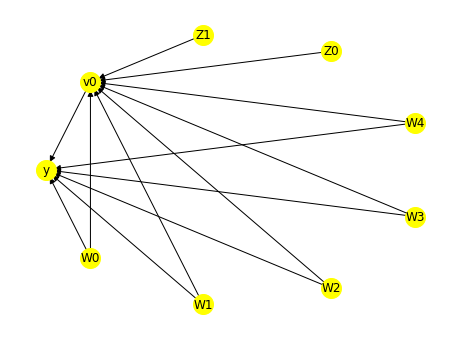

In [26]:
# we can visualise the model/graph
model.view_model()

Based on the graph, we can identify computable expressions based on the graph only. We can then evaluate these expressions in the next step.

In [27]:
identified_estimand = model.identify_effect()
print(identified_estimand)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                                 
─────(Expectation(y|W3,W2,W0,W1,W4))
d[v₀]                               
Estimand assumption 1, Unconfoundedness: If U→{v0} and U→y then P(y|v0,W3,W2,W0,W1,W4,U) = P(y|v0,W3,W2,W0,W1,W4)

### Estimand : 2
Estimand name: iv
Estimand expression:
Expectation(Derivative(y, [Z0, Z1])*Derivative([v0], [Z0, Z1])**(-1))
Estimand assumption 1, As-if-random: If U→→y then ¬(U →→{Z0,Z1})
Estimand assumption 2, Exclusion: If we remove {Z0,Z1}→{v0}, then ¬({Z0,Z1}→y)

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



We can calculate a causal estimate based on the data and the expressions found in the previous step.

In [28]:
causal_estimate = model.estimate_effect(identified_estimand,
        method_name="backdoor.propensity_score_stratification")
print(causal_estimate)
print("Causal Estimate is " + str(causal_estimate.value))

*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                                 
─────(Expectation(y|W3,W2,W0,W1,W4))
d[v₀]                               
Estimand assumption 1, Unconfoundedness: If U→{v0} and U→y then P(y|v0,W3,W2,W0,W1,W4,U) = P(y|v0,W3,W2,W0,W1,W4)

## Realized estimand
b: y~v0+W3+W2+W0+W1+W4
Target units: ate

## Estimate
Mean value: 10.026455343460649

Causal Estimate is 10.026455343460649


Finally, there are a number of techniques we can apply to test whether the estimate is accurate when adding in noise, downsampling, etc.

In [29]:
res_random=model.refute_estimate(identified_estimand, causal_estimate, method_name="random_common_cause")
print(res_random)

Refute: Add a random common cause
Estimated effect:10.026455343460649
New effect:10.0160005345707
p value:0.31000000000000005



Here we've added a random common cause, and it has not significantly affected our estimate. This gives us more confidence in our estimate. There are numerous other refutation techniques available in DoWhy.

The example above uses synthetic data generated according to a causal graph. We can also apply DoWhy to real-world data where we believe there to be an underlying causal graph. In this example, we use DoWhy on the Infant Health and Development Program Dataset (Hill, J. L. (2011). Bayesian nonparametric modeling for causal inference. Journal of Computational and Graphical Statistics, 20(1), 217-240. https://doi.org/10.1198/jcgs.2010.08162). The example is taken from https://microsoft.github.io/dowhy/example_notebooks/dowhy_refutation_testing.html#IHDP.

In [31]:
# we first load the data from a URL
data = pd.read_csv("https://raw.githubusercontent.com/AMLab-Amsterdam/CEVAE/master/datasets/IHDP/csv/ihdp_npci_1.csv", header = None)

# here we are creating names for the columns
col =  ["treatment", "y_factual", "y_cfactual", "mu0", "mu1" ,]
for i in range(1,26):
    col.append("x"+str(i))
data.columns = col

# finally, we change the treatment column to a boolean and view the top of the dataframe
data = data.astype({"treatment":'bool'}, copy=False)
data.head()

,treatment,y_factual,y_cfactual,mu0,mu1,x1,x2,x3,x4,x5,...,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25
0,True,5.599916,4.318780,3.268256,6.854457,-0.528603,-0.343455,1.128554,0.161703,-0.316603,...,1,1,1,1,0,0,0,0,0,0
1,False,6.875856,7.856495,6.636059,7.562718,-1.736945,-1.802002,0.383828,2.244320,-0.629189,...,1,1,1,1,0,0,0,0,0,0
2,False,2.996273,6.633952,1.570536,6.121617,-0.807451,-0.202946,-0.360898,-0.879606,0.808706,...,1,0,1,1,0,0,0,0,0,0
3,False,1.366206,5.697239,1.244738,5.889125,0.390083,0.596582,-1.850350,-0.879606,-0.004017,...,1,0,1,1,0,0,0,0,0,0
4,False,1.963538,6.202582,1.685048,6.191994,-1.045229,-0.602710,0.011465,0.161703,0.683672,...,1,1,1,1,0,0,0,0,0,0


We can create the DoWhy causal model with the data and the common causes, and visualise the resulting causal graph.

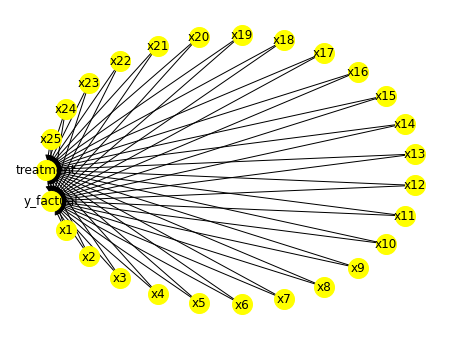

In [32]:
# making all 'x' variables common causes
common_causes = []

for i in range(1, 26):
    common_causes += ["x"+str(i)]

# creating and viewing the CausalModel
ihdp_model = CausalModel(
                data=data,
                treatment='treatment',
                outcome='y_factual',
                common_causes=common_causes
            )
ihdp_model.view_model(layout="dot")

We can identify the causal effect from the causal graph.

In [33]:
#Identify the causal effect for the ihdp dataset
ihdp_identified_estimand = ihdp_model.identify_effect(proceed_when_unidentifiable=True)
print(ihdp_identified_estimand)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                                                        
────────────(Expectation(y_factual|x8,x11,x3,x18,x12,x17,x23,x10,x19,x15,x6,x7
d[treatment]                                                                  

                                                 
,x14,x4,x16,x13,x21,x20,x1,x2,x5,x22,x9,x24,x25))
                                                 
Estimand assumption 1, Unconfoundedness: If U→{treatment} and U→y_factual then P(y_factual|treatment,x8,x11,x3,x18,x12,x17,x23,x10,x19,x15,x6,x7,x14,x4,x16,x13,x21,x20,x1,x2,x5,x22,x9,x24,x25,U) = P(y_factual|treatment,x8,x11,x3,x18,x12,x17,x23,x10,x19,x15,x6,x7,x14,x4,x16,x13,x21,x20,x1,x2,x5,x22,x9,x24,x25)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



We can then calculate the causal estimate using propensity score weighting.

In [34]:
ihdp_estimate = ihdp_model.estimate_effect(
                    ihdp_identified_estimand,
                    method_name="backdoor.propensity_score_weighting"
                )

print("The Causal Estimate is " + str(ihdp_estimate.value))

The Causal Estimate is 4.0287482183901755


Finally, we test the validity of our estimate by replacing the treatment with a placebo. We see that there is now no effect from the treatment, increasing our confidence in our estimate.

In [34]:
ihdp_refute_placebo_treatment = ihdp_model.refute_estimate(
                                    ihdp_identified_estimand,
                                    ihdp_estimate,
                                    method_name="placebo_treatment_refuter",
                                    placebo_type="permute"
                                )

print(ihdp_refute_placebo_treatment)

Refute: Use a Placebo Treatment
Estimated effect:4.028748218390039
New effect:-0.028682062611497406
p value:0.42000000000000004

